In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
import requests
requests.__version__

'2.24.0'

In [7]:
city_data = []

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32312c6a6ec7424454be63618bbc66df


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 13 | barrow
Processing Record 2 of Set 13 | dikson
Processing Record 3 of Set 13 | ushuaia
Processing Record 4 of Set 13 | caruray
Processing Record 5 of Set 13 | longyearbyen
Processing Record 6 of Set 13 | nikolskoye
Processing Record 7 of Set 13 | sydney
Processing Record 8 of Set 13 | hargeysa
Processing Record 9 of Set 13 | letka
Processing Record 10 of Set 13 | khatanga
Processing Record 11 of Set 13 | naze
Processing Record 12 of Set 13 | japura
Processing Record 13 of Set 13 | ixtapa
Processing Record 14 of Set 13 | toledo
Processing Record 15 of Set 13 | faanui
Processing Record 16 of Set 13 | port alfred
Processing Record 17 of Set 13 | saint-philippe
Processing Record 18 of Set 13 | klaksvik
Processing Record 19 of Set 13 | new norfolk
Processing Record 20 of Set 13 | pisco
Processing Record 21 of Set 13 | mataura
Processing Record 22 of Set 13 | atar
Processing Record 23 of Set 13 | olafsvik
Processing Record 24 of Set 13 | bambous virieux
Process

In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 23 of Set 25 | barrow
Processing Record 24 of Set 25 | dikson
Processing Record 25 of Set 25 | ushuaia
Processing Record 26 of Set 25 | caruray
Processing Record 27 of Set 25 | longyearbyen
Processing Record 28 of Set 25 | nikolskoye
Processing Record 29 of Set 25 | sydney
Processing Record 30 of Set 25 | hargeysa
Processing Record 31 of Set 25 | letka
Processing Record 32 of Set 25 | khatanga
Processing Record 33 of Set 25 | naze
Processing Record 34 of Set 25 | japura
Processing Record 35 of Set 25 | ixtapa
Processing Record 36 of Set 25 | toledo
Processing Record 37 of Set 25 | faanui
Processing Record 38 of Set 25 | port alfred
Processing Record 39 of Set 25 | saint-philippe
Processing Record 40 of Set 25 | klaksvik
Processing Record 41 of Set 25 | new norfolk
Processing Record 42 of Set 25 | pisco
Processing Record 43 of Set 25 | mataura
Processing Record 44 of Set 25 | atar
Processing Record 45 of Set 25 | olafsvik
Processing Record 46 of Set 25 | bambous virieu

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-11.20,70,1,3.44,US,2021-03-27 14:37:45
1,Dikson,73.5069,80.5464,-16.04,100,57,8.55,RU,2021-03-27 14:37:45
2,Ushuaia,-54.8000,-68.3000,51.80,66,75,8.93,AR,2021-03-27 14:36:23
3,Caruray,10.3094,119.0128,78.30,87,96,5.10,PH,2021-03-27 14:37:45
4,Longyearbyen,78.2186,15.6401,21.20,79,75,33.38,SJ,2021-03-27 14:37:46
5,Nikolskoye,59.7035,30.7861,50.00,53,0,6.71,RU,2021-03-27 14:37:46
6,Sydney,-33.8679,151.2073,68.00,64,0,2.30,AU,2021-03-27 14:37:46
7,Hargeysa,9.5600,44.0650,73.98,41,8,17.56,SO,2021-03-27 14:37:46
8,Letka,59.6011,49.4232,25.93,92,56,3.78,RU,2021-03-27 14:37:47
9,Khatanga,71.9667,102.5000,4.41,94,100,6.93,RU,2021-03-27 14:37:47


In [16]:
city_data_df = city_data_df [["City", "Country", "Date","Lat", "Lng", "Max Temp", 
                              "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-03-27 14:37:45,71.2906,-156.7887,-11.20,70,1,3.44
1,Dikson,RU,2021-03-27 14:37:45,73.5069,80.5464,-16.04,100,57,8.55
2,Ushuaia,AR,2021-03-27 14:36:23,-54.8000,-68.3000,51.80,66,75,8.93
3,Caruray,PH,2021-03-27 14:37:45,10.3094,119.0128,78.30,87,96,5.10
4,Longyearbyen,SJ,2021-03-27 14:37:46,78.2186,15.6401,21.20,79,75,33.38
...,...,...,...,...,...,...,...,...,...
562,Koumac,NC,2021-03-27 14:40:57,-20.5667,164.2833,78.48,78,60,2.42
563,Ler,SS,2021-03-27 14:40:58,8.3018,30.1418,95.88,26,91,2.82
564,Broome,US,2021-03-27 14:40:58,42.2506,-75.8330,45.00,100,90,4.63
565,Cairns,AU,2021-03-27 14:39:47,-16.9167,145.7667,75.99,94,75,11.50


In [17]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        567 non-null    object 
 1   Country     567 non-null    object 
 2   Date        567 non-null    object 
 3   Lat         567 non-null    float64
 4   Lng         567 non-null    float64
 5   Max Temp    567 non-null    float64
 6   Humidity    567 non-null    int64  
 7   Cloudiness  567 non-null    int64  
 8   Wind Speed  567 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 40.0+ KB


In [18]:
city_data_df.count

<bound method DataFrame.count of              City Country                 Date      Lat       Lng  Max Temp  \
0          Barrow      US  2021-03-27 14:37:45  71.2906 -156.7887    -11.20   
1          Dikson      RU  2021-03-27 14:37:45  73.5069   80.5464    -16.04   
2         Ushuaia      AR  2021-03-27 14:36:23 -54.8000  -68.3000     51.80   
3         Caruray      PH  2021-03-27 14:37:45  10.3094  119.0128     78.30   
4    Longyearbyen      SJ  2021-03-27 14:37:46  78.2186   15.6401     21.20   
..            ...     ...                  ...      ...       ...       ...   
562        Koumac      NC  2021-03-27 14:40:57 -20.5667  164.2833     78.48   
563           Ler      SS  2021-03-27 14:40:58   8.3018   30.1418     95.88   
564        Broome      US  2021-03-27 14:40:58  42.2506  -75.8330     45.00   
565        Cairns      AU  2021-03-27 14:39:47 -16.9167  145.7667     75.99   
566        Witney      GB  2021-03-27 14:40:28  51.7836   -1.4854     51.80   

     Humidity  Clo

In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

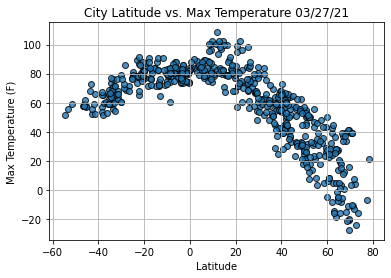

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

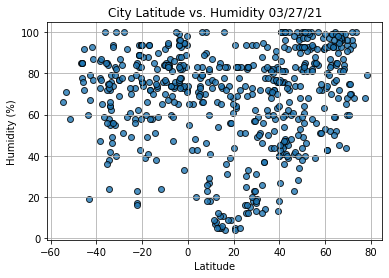

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

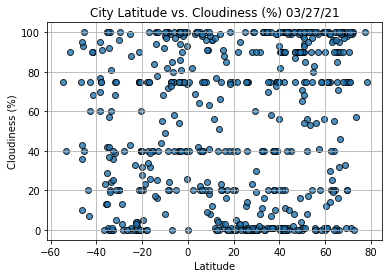

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

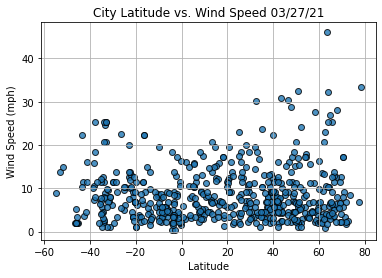

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()